In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

In [2]:

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [5]:
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
baseline_history = baseline_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))




Epoch 1/10
1500/1500 [==============================] - 49s 31ms/step - loss: 0.5303 - accuracy: 0.8019 - val_loss: 0.3721 - val_accuracy: 0.8654
Epoch 2/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3388 - accuracy: 0.8777 - val_loss: 0.3344 - val_accuracy: 0.8773
Epoch 3/10
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2906 - accuracy: 0.8927 - val_loss: 0.2882 - val_accuracy: 0.8932
Epoch 4/10
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2554 - accuracy: 0.9059 - val_loss: 0.2793 - val_accuracy: 0.8997
Epoch 5/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.2308 - accuracy: 0.9143 - val_loss: 0.2661 - val_accuracy: 0.9032
Epoch 6/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2109 - accuracy: 0.9216 - val_loss: 0.2506 - val_accuracy: 0.9090
Epoch 7/10
1500/1500 [==============================] - 44s 30ms/step - loss: 0.1888 - accuracy: 0.9299 - val_loss: 0.2612 -

In [6]:
baseline_loss, baseline_accuracy = baseline_model.evaluate(X_test, y_test)
print("Baseline Model Accuracy:", baseline_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.2770 - accuracy: 0.9079
Baseline Model Accuracy: 0.9078999757766724


In [7]:
from keras.models import load_model

baseline_model.save("improved_model.h5")
loaded_model = load_model("improved_model.h5")
predictions = loaded_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 8ms/step


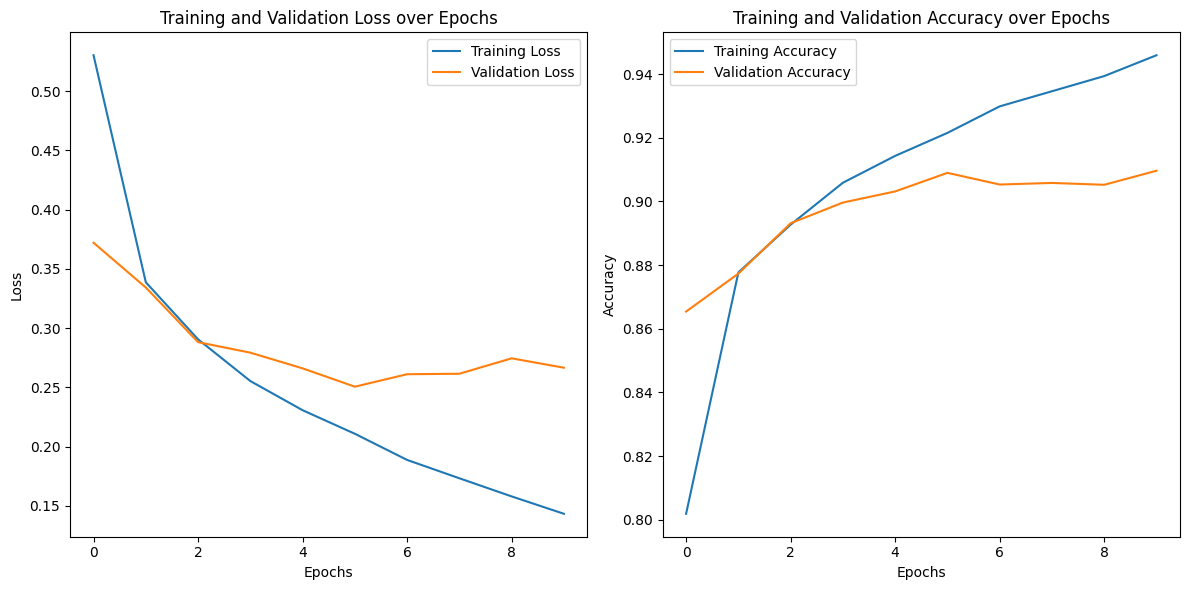

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['loss'], label='Training Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 2s 7ms/step


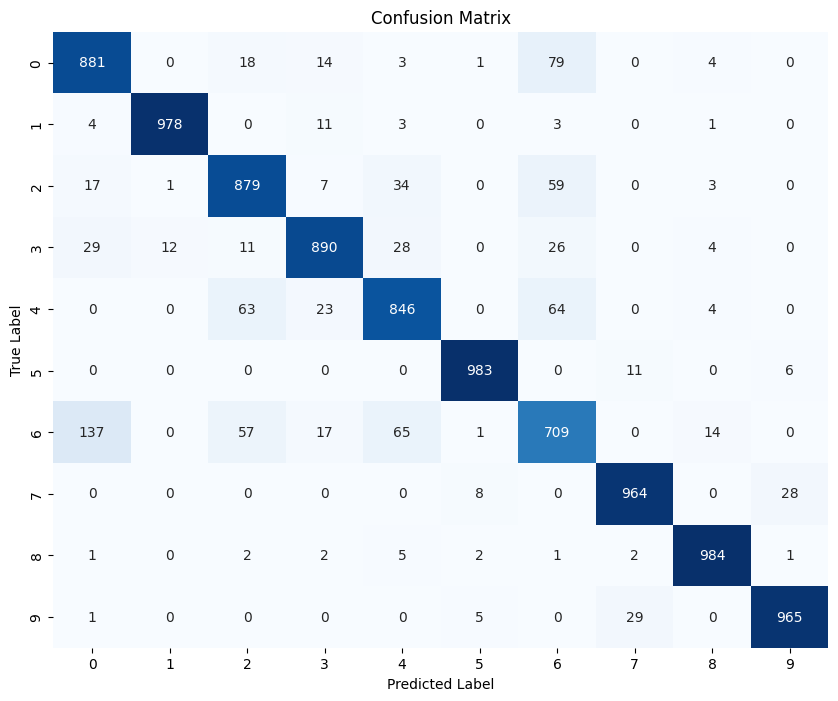

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_probs = baseline_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

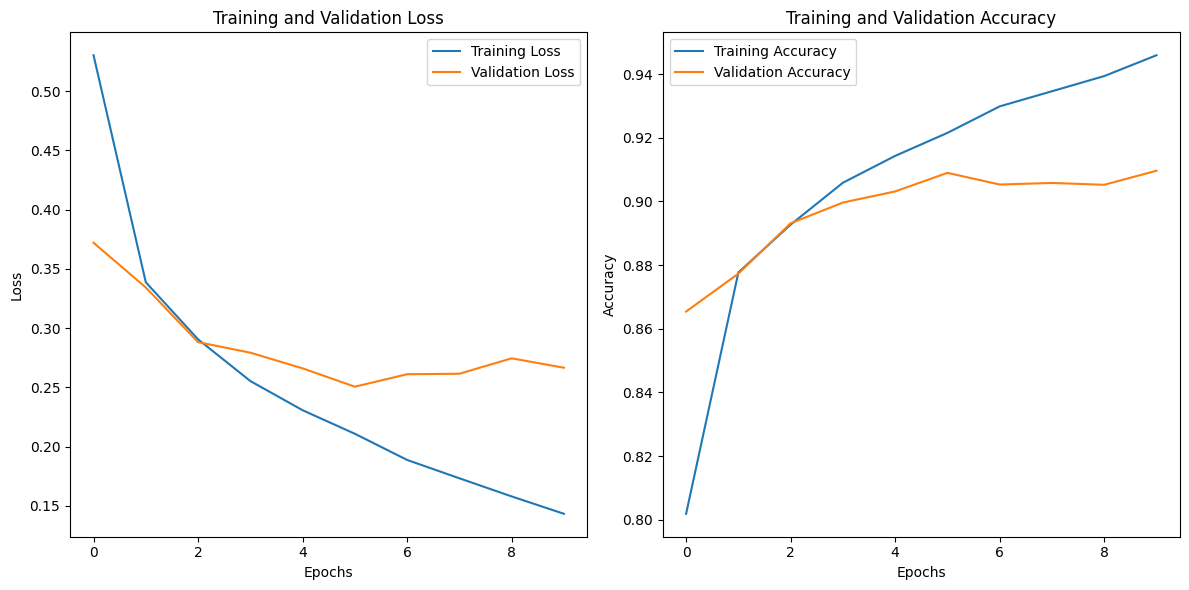

In [10]:
plt.figure(figsize=(12, 6))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['loss'], label='Training Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 2s 7ms/step


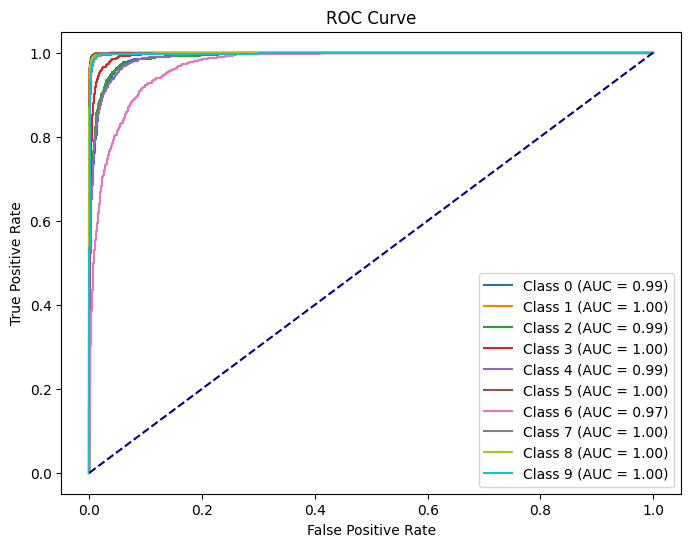

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_prob = baseline_model.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


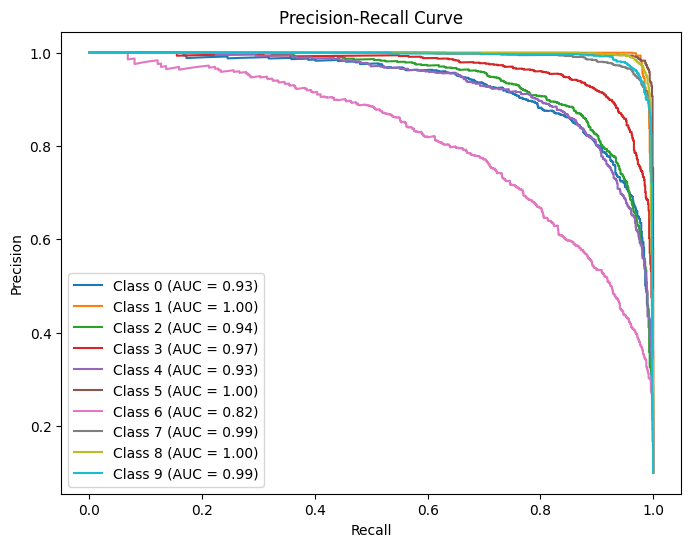

In [12]:
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()
pr_auc = dict()
for i in range(len(lb.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

plt.figure(figsize=(8, 6))
for i in range(len(lb.classes_)):
    plt.plot(recall[i], precision[i], label=f'Class {lb.classes_[i]} (AUC = {pr_auc[i]:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
